In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
x = np.linspace(-10,10,200)
y= np.sin(x)

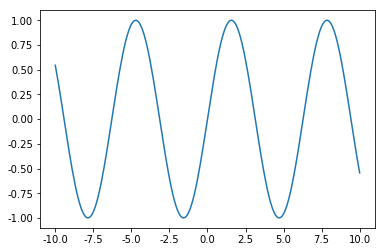

In [6]:
plt.plot(x,y)

In [3]:
import requests

def fetch(url):
    response = requests.get(url)
    response = requests.get(url, cookies={'over18': '1'})  # 一直向 server 回答滿 18 歲了 !
    return response

url = 'https://www.ptt.cc/bbs/gossiping/index.html'
resp = fetch(url)  # step-1

print(resp.text) # result of setp-1

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/co

In [6]:
from requests_html import HTML

In [7]:
def parse_article_entries(doc):
    html = HTML(html=doc)
    post_entries = html.find('div.r-ent')
    return post_entries

url = 'https://www.ptt.cc/bbs/movie/index.html'
resp = fetch(url)  # step-1
post_entries = parse_article_entries(resp.text)  # step-2

print(post_entries)  # result of setp-2

[<Element 'div' class=('r-ent',)>, <Element 'div' class=('r-ent',)>, <Element 'div' class=('r-ent',)>, <Element 'div' class=('r-ent',)>, <Element 'div' class=('r-ent',)>, <Element 'div' class=('r-ent',)>, <Element 'div' class=('r-ent',)>]


In [11]:
div.g > h3.r > a[href^="/url"]

SyntaxError: invalid syntax (<ipython-input-11-35e39f578b55>, line 1)

<!DOCTYPE doctype html>
<html lang="zh-TW">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   寒流 - Google 搜尋
  </title>
  <script nonce="pdS/jj3/2QEWzjiiXmUs5A==">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))
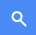

</html>


In [10]:
import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': '寒流'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  # print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.g > h3.r > a[href^="/url"]')
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))

In [12]:
from selenium import webdriver
import time
import urllib
import os
# 存圖位置
local_path = 'imgs'
# 爬取頁面網址 
url = 'http://pic.sogou.com/pics?ie=utf8&p=40230504&interV=kKIOkrELjboMmLkElbkTkKIMkbELjbgQmLkElbcTkKILmrELjb8TkKIKmrELjbkI_65458625&query=%E6%9F%AF%E5%9F%BA&'  
  
# 目標元素的xpath
xpath = '//div[@id="imgid"]/ul/li/a/img'
# 啟動chrome瀏覽器
chromeDriver = r'/Users/music1353/webDriverTool/chromedriver' # chromedriver檔案放的位置
driver = webdriver.Chrome(chromeDriver) 
  
# 最大化窗口，因為每一次爬取只能看到視窗内的圖片  
driver.maximize_window()  
  
# 紀錄下載過的圖片網址，避免重複下載  
img_url_dic = {}  
  
# 瀏覽器打開爬取頁面
driver.get(url)  
  
# 模擬滾動視窗瀏覽更多圖片
pos = 0  
m = 0 # 圖片編號 
for i in range(100):  
    pos += i*500 # 每次下滾500  
    js = "document.documentElement.scrollTop=%d" % pos  
    driver.execute_script(js)  
    time.sleep(1)
    
    for element in driver.find_elements_by_xpath(xpath):
        try:
            img_url = element.get_attribute('src')
            
            # 保存圖片到指定路徑
            if img_url != None and not img_url in img_url_dic:
                img_url_dic[img_url] = ''  
                m += 1
                # print(img_url)
                ext = img_url.split('/')[-1]
                # print(ext)
                filename = str(m) + 'kerGee' + '_' + ext +'.jpg'
                print(filename)
                
                # 保存圖片
                urllib.request.urlretrieve(img_url, os.path.join(local_path , filename))
                
        except OSError:
            print('發生OSError!')
            print(pos)
            break;
            
driver.close()

ModuleNotFoundError: No module named 'selenium'